In [3]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [4]:
# Read Dataset
transactions_file = "/content/gdrive/MyDrive/Transaction_Data.csv"
product_file = "/content/gdrive/MyDrive/Product_Offering_Data.csv"
customer_file = "/content/gdrive/MyDrive/Customer_Feedback_Data.csv"
transactions_data = pd.read_csv(transactions_file)
product_data = pd.read_csv(product_file)
customer_data = pd.read_csv(customer_file)

In [5]:
transactions_data.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [6]:
product_data.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [8]:
customer_data.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


In [7]:
transactions_data.tail()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
5045,3034,317,2023-05-07 09:00:00,3018.0,Purchase
5046,583,336,2023-01-25 06:00:00,2670.0,Bill Payment
5047,1211,550,2023-02-20 10:00:00,3252.0,Bill Payment
5048,2259,258,2023-04-05 02:00:00,3442.0,Purchase
5049,1159,271,2023-02-18 06:00:00,108.0,Loan Payment


In [9]:
product_data.tail()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
10,2,Gold Savings Account,Savings Account,Low,NaN,Low
11,10,Travel Credit Card,Credit Card,Medium,NaN,Medium
12,3,High-Yield Investment Account,Investment,High,NaN,High
13,6,Personal Loan,Loan,Medium,NaN,Low
14,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium


In [10]:
customer_data.tail()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
5045,757,9.0,Good service,3
5046,969,2.0,Unsatisfactory,2
5047,248,4.0,Good service,3
5048,58,4.0,Unsatisfactory,10
5049,635,4.0,Very satisfied,6


In [11]:
transactions_data.shape

(5050, 5)

In [12]:
product_data.shape

(15, 6)

In [ ]:
customer_data.shape

In [13]:
#sanity check of data
transactions_data.info()
customer_data.info()
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type    5050 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 197.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157

In [14]:
#data cleaning for each dataset
#check for missing value
print(transactions_data.isnull().sum())
print(product_data.isnull().sum())
print(customer_data.isnull().sum())

Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64
Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       15
Target_Income_Group     0
dtype: int64
Customer_ID                  0
Satisfaction_Score         101
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64


In [15]:
#check for duplicates
print(transactions_data.duplicated().sum())
print(product_data.duplicated().sum())
print(customer_data.duplicated().sum())

50
5
81


In [16]:
#identifying garbage value of transactions_data
for i in transactions_data.select_dtypes(include="object").columns:
  print(transactions_data[i].value_counts())
  print("***"*10)

Transaction_Date
2023-01-07 11:00:00    2
2023-05-19 14:00:00    2
2023-01-07 14:00:00    2
2023-06-11 05:00:00    2
2023-07-17 13:00:00    2
                      ..
2023-03-11 20:00:00    1
2023-03-11 19:00:00    1
2023-03-11 18:00:00    1
2023-03-11 17:00:00    1
2023-07-28 07:00:00    1
Name: count, Length: 5000, dtype: int64
******************************
Transaction_Type
Loan Payment    1294
Investment      1256
Bill Payment    1251
Purchase        1249
Name: count, dtype: int64
******************************


In [17]:
#identifying garbage value of product_data
for i in product_data.select_dtypes(include="object").columns:
  print(product_data[i].value_counts())
  print("***"*10)

Product_Name
Platinum Credit Card             2
Gold Savings Account             2
High-Yield Investment Account    2
Personal Loan                    2
Travel Credit Card               2
Mortgage Loan                    1
Auto Loan                        1
Youth Savings Account            1
Retirement Investment Fund       1
Business Loan                    1
Name: count, dtype: int64
******************************
Product_Type
Loan               5
Credit Card        4
Savings Account    3
Investment         3
Name: count, dtype: int64
******************************
Risk_Level
Medium    9
Low       3
High      3
Name: count, dtype: int64
******************************
Target_Income_Group
Medium    6
Low       5
High      4
Name: count, dtype: int64
******************************


In [18]:
#identifying garbage value of customer_Data
for i in customer_data.select_dtypes(include="object").columns:
  print(customer_data[i].value_counts())
  print("***"*10)

Feedback_Comments
Good service         1519
Needs improvement    1044
Very satisfied       1015
Unsatisfactory        988
Excellent             484
Name: count, dtype: int64
******************************


In [19]:
# descriptive statistics for transactions_data
transactions_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,5050.0,2498.927129,1443.059092,1.0,1250.25,2500.5,3745.75,5000.0
Customer_ID,5050.0,504.692871,291.593793,1.0,251.25,509.0,764.00,1000.0
Transaction_Amount,4950.0,3094.726465,14818.501011,10.0,1239.00,2483.0,3706.00,480300.0


In [ ]:
#descriptive statistics for customer_data
customer_data.describe().T

In [21]:
product_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_ID,15.0,5.133333,3.159265,1.0,2.5,5.0,7.5,10.0
Target_Age_Group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
transactions_data.describe(include="object")

,Transaction_Date,Transaction_Type
count,5050,5050
unique,5000,4
top,2023-01-07 11:00:00,Loan Payment
freq,2,1294


In [22]:
customer_data.describe(include="object")

,Feedback_Comments
count,5050
unique,5
top,Good service
freq,1519


In [23]:
product_data.describe(include="object")

,Product_Name,Product_Type,Risk_Level,Target_Income_Group
count,15,15,15,15
unique,10,4,3,3
top,Platinum Credit Card,Loan,Medium,Medium
freq,2,5,9,6


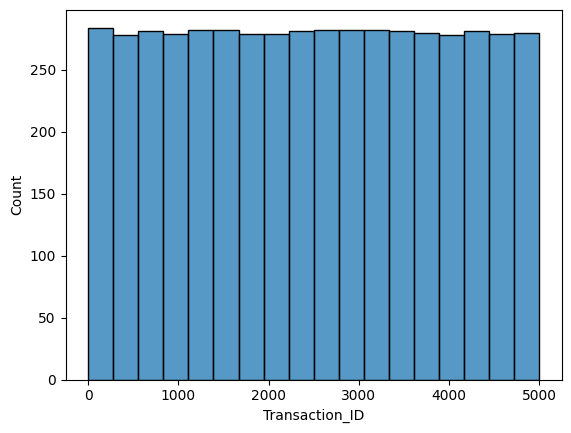

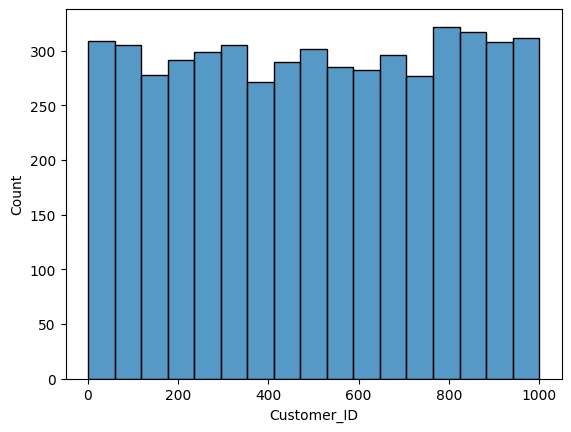

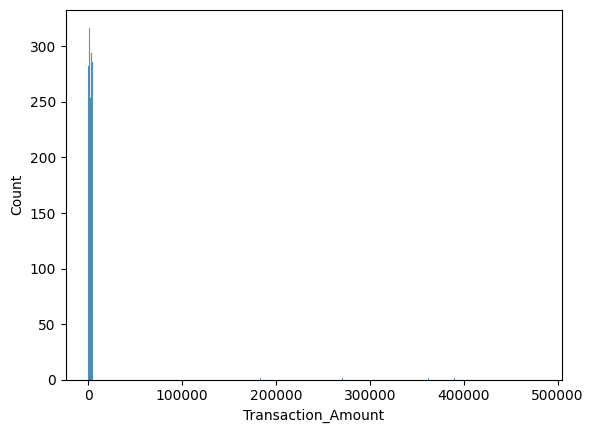

In [24]:
#histogram to understand distribution
for i in transactions_data.select_dtypes(include="number").columns:
  sns.histplot(data=transactions_data,x=i)
  plt.show()

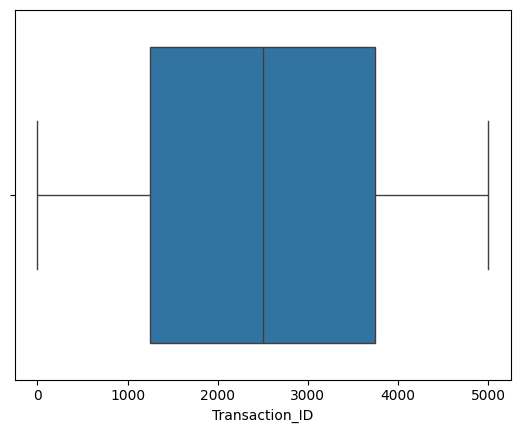

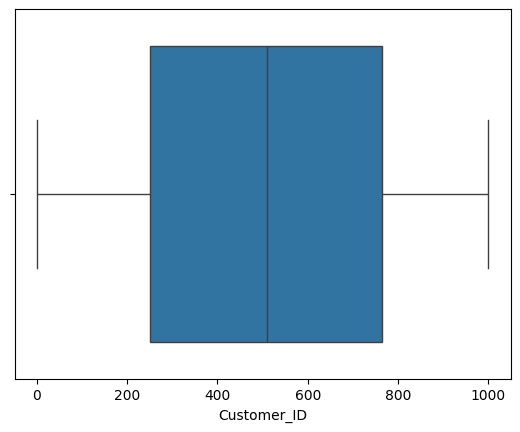

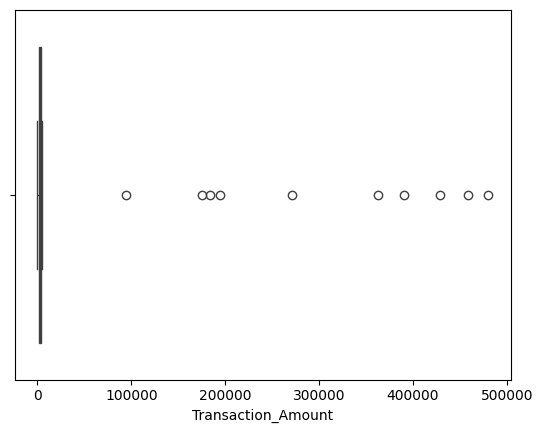

In [25]:
#boxplot-to-identify outliers
for i in transactions_data.select_dtypes(include="number").columns:
  sns.boxplot(data=transactions_data,x=i)
  plt.show()

In [26]:
transactions_data.select_dtypes(include="number").columns

Index(['Transaction_ID', 'Customer_ID', 'Transaction_Amount'], dtype='object')

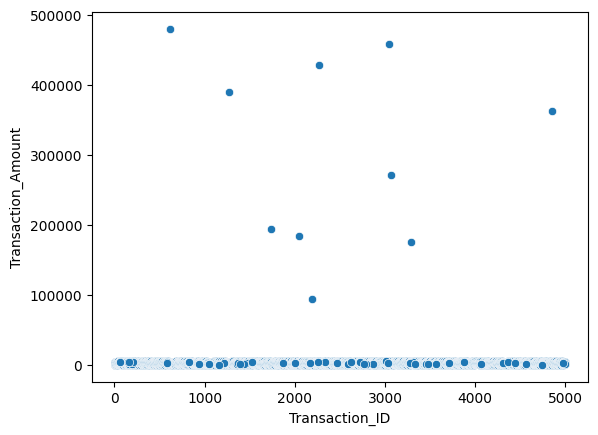

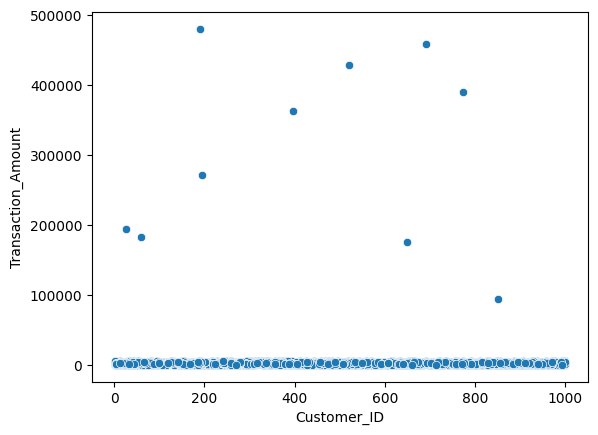

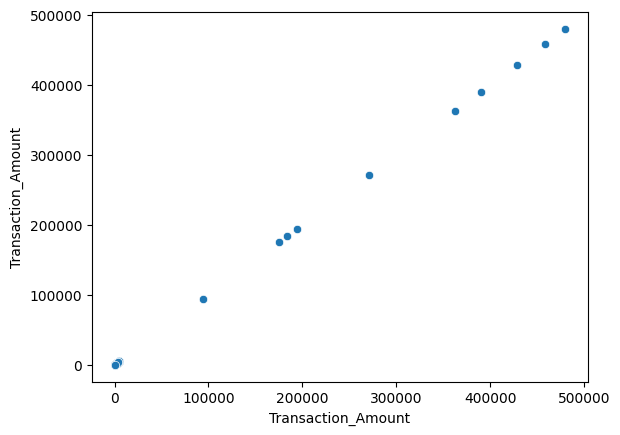

In [27]:
# scatter plot to understand the relationship
for i in ['Transaction_ID', 'Customer_ID', 'Transaction_Amount']:
  sns.scatterplot(data=transactions_data,x=i,y='Transaction_Amount')
  plt.show()

In [28]:
# correlation with heatmap to interpret the relation and multicolliniarity
s=transactions_data.select_dtypes(include="number").corr()

<Axes: >

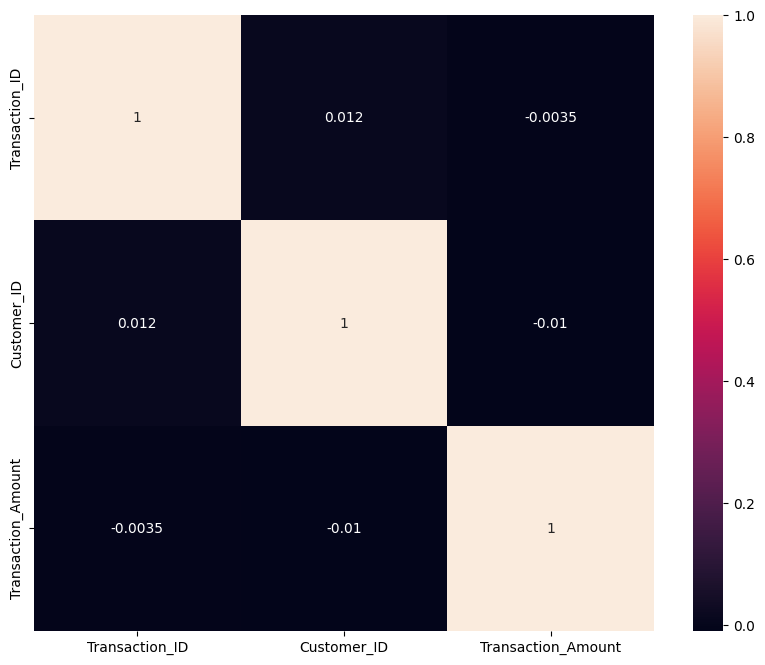

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(s,annot=True)

In [30]:
print(transactions_data.isnull().sum())
print(product_data.isnull().sum())
print(customer_data.isnull().sum())

Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64
Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       15
Target_Income_Group     0
dtype: int64
Customer_ID                  0
Satisfaction_Score         101
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64


In [31]:
#replace missing values
product_data["Target_Age_Group"] = product_data["Target_Age_Group"].fillna("unknown")

In [32]:
from sklearn.impute import KNNImputer
impute=KNNImputer

In [33]:
print("Unique Values in Target_Age_Group:")
print(product_data["Target_Age_Group"].value_counts())

Unique Values in Target_Age_Group:
Target_Age_Group
unknown    15
Name: count, dtype: int64


In [34]:
print(product_data["Target_Income_Group"].value_counts())

Target_Income_Group
Medium    6
Low       5
High      4
Name: count, dtype: int64


In [35]:
print(product_data.describe(include='all'))

        Product_ID          Product_Name Product_Type Risk_Level  \
count    15.000000                    15           15         15   
unique         NaN                    10            4          3   
top            NaN  Platinum Credit Card         Loan     Medium   
freq           NaN                     2            5          9   
mean      5.133333                   NaN          NaN        NaN   
std       3.159265                   NaN          NaN        NaN   
min       1.000000                   NaN          NaN        NaN   
25%       2.500000                   NaN          NaN        NaN   
50%       5.000000                   NaN          NaN        NaN   
75%       7.500000                   NaN          NaN        NaN   
max      10.000000                   NaN          NaN        NaN   

       Target_Age_Group Target_Income_Group  
count                15                  15  
unique                1                   3  
top             unknown              Medium  

In [36]:
#Outliers Treatment
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [38]:
product_data.columns

Index(['Product_ID', 'Product_Name', 'Product_Type', 'Risk_Level',
       'Target_Age_Group', 'Target_Income_Group'],
      dtype='object')

In [42]:
#duplicates and garbage value treatment
product_data.drop_duplicates()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,unknown,Medium
1,2,Gold Savings Account,Savings Account,Low,unknown,Low
2,3,High-Yield Investment Account,Investment,High,unknown,High
3,4,Mortgage Loan,Loan,Medium,unknown,High
4,5,Auto Loan,Loan,Medium,unknown,Medium
5,6,Personal Loan,Loan,Medium,unknown,Low
6,7,Youth Savings Account,Savings Account,Low,unknown,Low
7,8,Retirement Investment Fund,Investment,High,unknown,High
8,9,Business Loan,Loan,Medium,unknown,Medium
9,10,Travel Credit Card,Credit Card,Medium,unknown,Medium


In [46]:
#encoding of data
#do label encoding and hot encoding with pd.getdummies
dummy=pd.get_dummies(data=product_data,columns=['Target_Age_Group','Target_Income_Group'],drop_first=True)

In [48]:
dummy

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group_Low,Target_Income_Group_Medium
0,1,Platinum Credit Card,Credit Card,Medium,False,True
1,2,Gold Savings Account,Savings Account,Low,True,False
2,3,High-Yield Investment Account,Investment,High,False,False
3,4,Mortgage Loan,Loan,Medium,False,False
4,5,Auto Loan,Loan,Medium,False,True
5,6,Personal Loan,Loan,Medium,True,False
6,7,Youth Savings Account,Savings Account,Low,True,False
7,8,Retirement Investment Fund,Investment,High,False,False
8,9,Business Loan,Loan,Medium,False,True
9,10,Travel Credit Card,Credit Card,Medium,False,True
